# Submit a job to the IBM platform

This notebook provides a minimal example illustrates how to submit a job to the [IBMQ platform](https://quantum-computing.ibm.com/).

## The job

First of all, we'll need a job to be submitted.
The code below creates a small quantum circuit.

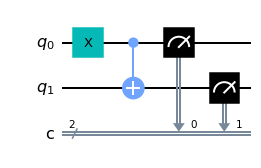

In [3]:
# Create a small circuit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
q = QuantumRegister(2,"q")
c = ClassicalRegister(2,"c")
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.cx(q[0], q[1])
circuit.measure(q,c)

circuit.draw(output='mpl')

## Authentication

In order to submit a job to IBMq you'll need an IBM personal `token`.
Additionally, you'll need a `hub`, a `group` and a `project`.
All this information can be obtained from your IBMQ account (https://quantum-computing.ibm.com/).

In [4]:
# Your personal and confidential token
ibmq_token = # <--- Insert your token here

# Some extra information
hub = 'ibm-q-qal' # Which hub to use
group = 'escience' # Your working group's id
project = 'qradio' # Your project's id

## Log in

Once the credentials are set-up, the log in is straightforward.

In [5]:
# Log in
from qiskit import IBMQ
IBMQ.enable_account(ibmq_token)
provider = IBMQ.get_provider(hub=hub, group=group, project=project)

## Choose a backend

The list of available backends can be accessed with `provider.backends()`:

In [6]:
print(provider.backends())

[<IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q-qal', group='escience', project='qradio')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q-qal', group='escience', project='qradio')>, <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q-qal', group='escience', project='qradio')>]


In order to proceed, we have to choose one:

In [7]:
# Select a backend and get its status
backend = provider.get_backend('ibm_nairobi') 
backend.status()

## Submit and run a job

Now we are finally ready to do something useful with our setup.
The snippets below show how to submit, run, and retrieve the results of our job.

In [8]:
# Submit the job to the IBM backend
job = backend.run(circuit, shots=1024)

In [9]:
# And get result
result = job.result()
counts = result.get_counts()
counts

{'00': 11, '01': 44, '10': 54, '11': 915}